In [1]:
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Chargement des données


In [2]:
data = arff.loadarff('data/tecator.arff')

In [3]:
df = pd.DataFrame(data[0])
df.head()

,absorbance_1,absorbance_2,absorbance_3,absorbance_4,absorbance_5,absorbance_6,absorbance_7,absorbance_8,absorbance_9,absorbance_10,...,principal_component_16,principal_component_17,principal_component_18,principal_component_19,principal_component_20,principal_component_21,principal_component_22,moisture,fat,protein
0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,0.233876,0.899661,-0.042006,0.708717,-0.254173,-0.391579,-0.419313,60.5,22.5,16.7
1,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,-0.195980,-0.046359,-0.634996,-0.354403,0.014650,0.269542,0.096692,46.0,40.1,13.5
2,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,0.795466,0.762246,-1.268580,0.690588,-0.785592,-0.671237,-0.710290,71.0,8.4,20.5
3,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,0.616500,-0.388684,-2.068390,1.276160,-0.259437,-0.140206,-0.165963,72.8,5.9,20.7
4,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,-1.095540,-1.348450,0.453559,0.402624,0.031307,0.021824,0.145777,58.3,25.5,15.5


# Exploration rapide des données

Je préfère manipuler des arrays numpy, donc je fais un premier split manuellement.

In [4]:
X_abs = df.iloc[:, :100]
X_pca = df.iloc[:, 100:122]
mois = df.iloc[:,-3]
fat = df.iloc[:, -2]
protein = df.iloc[:, -1]

In [5]:
fat.describe()

count    240.000000
mean      18.502083
std       14.362505
min        0.900000
25%        7.075000
50%       13.500000
75%       28.325000
max       58.500000
Name: fat, dtype: float64

In [6]:
np_abs = X_abs.to_numpy()
np_fat = fat.to_numpy()
np_protein = protein.to_numpy()

In [7]:
x_axis = np.arange(850, 1050, 2)

In [8]:
norm = mpl.colors.Normalize(vmin=0, vmax=np_fat.max())
cmap = cm.jet

m = cm.ScalarMappable(norm=norm, cmap=cmap)

Text(0, 0.5, 'Absorbance (dB)')

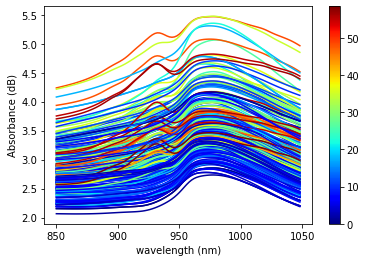

In [29]:
for i in range(np_abs.shape[0]):
    plt.plot(x_axis, np_abs[i], color=m.to_rgba(np_fat[i]))
plt.colorbar(m)
plt.xlabel("wavelength (nm)")
plt.ylabel("Absorbance (dB)")

Text(0, 0.5, 'Absorbance (dB)')

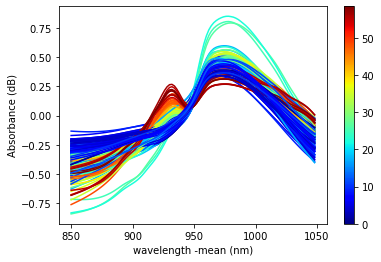

In [31]:
for i in range(np_abs.shape[0]):
    plt.plot(x_axis, (np_abs[i] - np.mean(np_abs[i])), color=m.to_rgba(np_fat[i]))
plt.colorbar(m)
plt.xlabel("wavelength -mean (nm)")
plt.ylabel("Absorbance (dB)")

Text(0, 0.5, 'Absorbance (dB)')

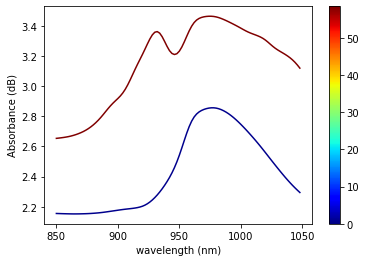

In [10]:
plt.plot(x_axis, np_abs[np_fat.argmin()], color=m.to_rgba(np_fat[np_fat.argmin()]))
plt.plot(x_axis, np_abs[np_fat.argmax()], color=m.to_rgba(np_fat[np_fat.argmax()]))
plt.colorbar(m)
plt.xlabel("wavelength (nm)")
plt.ylabel("Absorbance (dB)")

Text(0, 0.5, 'absorbance first derivative')

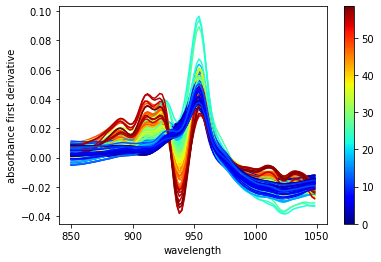

In [11]:
for i in range(np_abs.shape[0]):
    plt.plot(x_axis, np.gradient(np_abs[i]), color=m.to_rgba(np_fat[i]))
plt.colorbar(m)
plt.xlabel("wavelength")
plt.ylabel('absorbance first derivative')

Text(0, 0.5, 'absorbance second derivative')

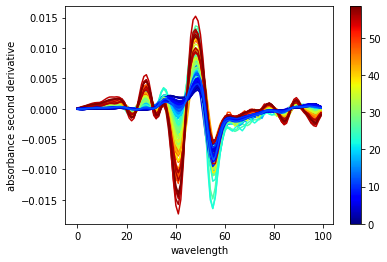

In [12]:
for i in range(np_abs.shape[0]):
    plt.plot(np.gradient(np.gradient(np_abs[i])), color=m.to_rgba(np_fat[i]))
plt.colorbar(m)
plt.xlabel("wavelength")
plt.ylabel('absorbance second derivative')

In [13]:
dydx = np.gradient(np_abs, axis=1)

In [14]:
ddydx = np.gradient(np.gradient(np_abs, axis=1), axis=1)

In [15]:
distance_crete_crete = 10*np.abs(np.max(ddydx, axis=1)-np.min(ddydx, axis=1))

Text(0, 0.5, 'fat')

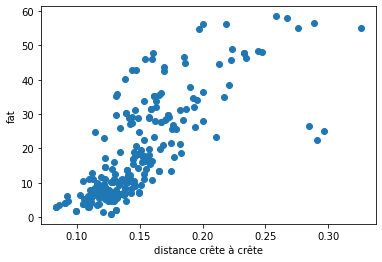

In [16]:
plt.scatter(distance_crete_crete, fat)
plt.xlabel("distance crête à crête")
plt.ylabel('fat')

In [17]:
from sklearn.feature_selection import mutual_info_regression

In [18]:
mi_fat_abs = mutual_info_regression(X_abs, fat)
mi_fat_pca = mutual_info_regression(X_pca, fat)

mi_fat_der = mutual_info_regression(dydx, fat)
mi_fat_der2 = mutual_info_regression(ddydx, fat)


Text(0, 0.5, 'MI')

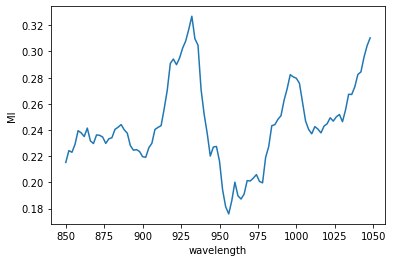

In [19]:
plt.plot(x_axis, mi_fat_abs)
plt.xlabel('wavelength')
plt.ylabel('MI')

# Information mutuelle sur les valeurs de la dérivée de l'absorption

Text(0, 0.5, 'MI')

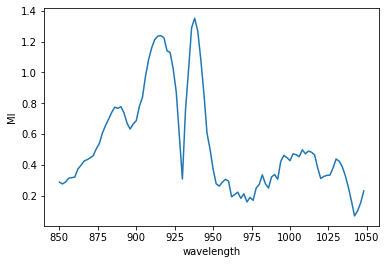

In [20]:
plt.plot(x_axis, mi_fat_der)
plt.xlabel('wavelength')
plt.ylabel('MI')

# Information mutuelle sur les valeurs de la dérivée seconde de l'absorption

Text(0, 0.5, 'MI')

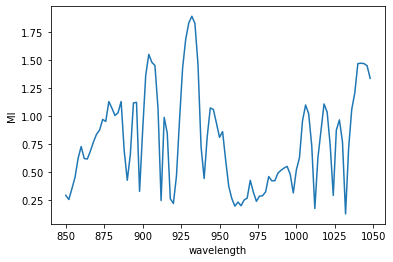

In [21]:
plt.plot(x_axis, mi_fat_der2)
plt.xlabel('wavelength')
plt.ylabel('MI')

# Information mutuelle sur les valeurs de la PCA

Text(0, 0.5, 'MI')

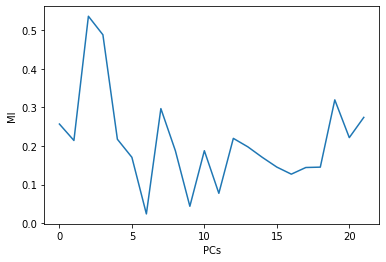

In [22]:
plt.plot(mi_fat_pca)
plt.xlabel('PCs')
plt.ylabel('MI')

# Premier split des donnée

Le split se base sur la description faite dans le lien https://www.openml.org/search?type=data&sort=runs&id=505&status=active à savoir:  
- Les échantillons 1-172 pour l'entrainement  
- les échantillons 173-215 pour le test  

In [23]:
X_train_pca = X_pca.iloc[:173]
X_train_abs = X_abs.iloc[:173]
y_train = fat.iloc[:173]

X_test_pca = X_pca.iloc[173:216]
X_test_abs = X_abs.iloc[173:216]
y_test = fat.iloc[173:216]

Définition de la baseline avec une simple régression linéaire multivariée.
J'utilise ici les PC comme features d'entrée

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
linreg = LinearRegression()


In [26]:
linreg.fit(X_train_pca, y_train)


LinearRegression()

In [32]:
y_pred_lin = linreg.predict(X_test_pca)


Définition de la métrique préconisée par les auteurs du dataset

In [33]:
def SEP(pred, target):
    return np.sqrt(np.mean((pred-target)**2))

In [34]:
print("Performance SEP de la baseline", SEP(y_pred_lin, y_test))

Performance SEP de la baseline 2.8337957492493087


In [35]:
print('Métrique R2 de la baseline', linreg.score(X_test_pca, y_test))

Métrique R2 de la baseline 0.9551198718541063


# Craft de nouvelles features

Tentative d'exploitation des informations fournies par les dérivées de l'absorbance

In [36]:
from sklearn.decomposition import PCA, FastICA, TruncatedSVD

In [37]:
pca_abs = TruncatedSVD(n_components=9)
pca_der = TruncatedSVD(n_components=9)
pca_der2 = TruncatedSVD(n_components=9)

In [38]:
pca_abs.fit(X_train_abs)

TruncatedSVD(n_components=9)

In [39]:
pca_der.fit(np.gradient(X_train_abs, axis=1))


TruncatedSVD(n_components=9)

In [40]:
pca_der2.fit(np.gradient(np.gradient(X_train_abs, axis=1), axis=1))


TruncatedSVD(n_components=9)

In [45]:
mi_fat_custom_pca = mutual_info_regression(pca_abs.transform(X_abs), fat)
mi_fat_custom_pcader = mutual_info_regression(pca_der.transform(np.gradient(X_abs, axis=1)), fat)
mi_fat_custom_pcader2 = mutual_info_regression(pca_der2.transform(np.gradient(np.gradient(X_abs, axis=1), axis=1)), fat)


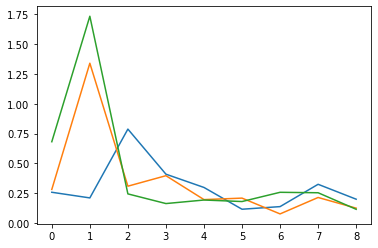

In [47]:
plt.plot(mi_fat_custom_pca)
plt.plot(mi_fat_custom_pcader)
plt.plot(mi_fat_custom_pcader2)

On repart sur la même méthode (regression linéaire) mais avec de nouvelles features

In [48]:
linregpca = LinearRegression()

Les nouvelles features sont justes les concaténations des PCA sur l'absorbance et ses deux premières dérivées.

In [49]:
new_X_train = np.concatenate([pca_abs.transform(X_train_abs), pca_der.transform(np.gradient(X_train_abs, axis=1)),
               pca_der2.transform(np.gradient(np.gradient(X_train_abs, axis=1), axis=1))], axis=1)

In [50]:
new_X_test = np.concatenate([pca_abs.transform(X_test_abs), pca_der.transform(np.gradient(X_test_abs, axis=1)),
               pca_der2.transform(np.gradient(np.gradient(X_test_abs, axis=1), axis=1))], axis=1)

In [51]:
linregpca.fit(new_X_train, y_train)

LinearRegression()

In [52]:
new_y_pred = linregpca.predict(new_X_test)

In [53]:
print("Performance R2 avec les nouvelles features", linregpca.score(new_X_test, y_test))

Performance R2 avec les nouvelles features 0.9477786723806603


In [54]:
print("Performance SEP avec les nouvelles features", SEP(y_pred_lin, y_test))

Performance SEP avec les nouvelles features 2.8337957492493087


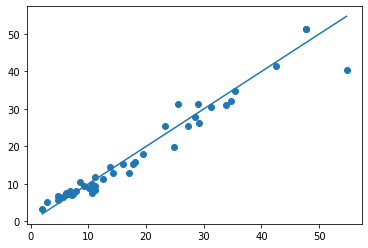

In [55]:
plt.scatter(y_test, new_y_pred)
plt.plot(np.linspace(y_test.min(), y_test.max()),np.linspace(y_test.min(), y_test.max()))

# Utilisation d'une méthode plus sophistiqué


In [56]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV


In [57]:
param_grid = [{
    "alpha":  np.linspace(1e-6,1e-4, 200),
    "kernel": ['poly', 'polynomial', 'rbf'],
    "degree": np.arange(1,5)
}]

Je me concentre sur le score R2

In [58]:
scores = ['r2']

In [59]:
kkr = KernelRidge()

In [60]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(estimator=kkr, param_grid=param_grid, cv=4,
                       scoring='%s' % score, n_jobs=10)
    clf.fit(new_X_train, y_train)
    print(clf.best_params_)
    print(clf.best_score_)

# Tuning hyper-parameters for r2

{'alpha': 1.4974874371859298e-06, 'degree': 3, 'kernel': 'poly'}
0.9847904931353149


In [61]:
kkr = KernelRidge(**clf.best_params_)

In [62]:
kkr.fit(new_X_train, y_train)

KernelRidge(alpha=1.4974874371859298e-06, kernel='poly')

In [63]:
new_y_pred_kkr = kkr.predict(new_X_test)

In [64]:
print("Performance R2 avec les nouvelles features et la méthode de Kernel Ridge", kkr.score(new_X_test, y_test))

Performance R2 avec les nouvelles features et la méthode de Kernel Ridge 0.9968347966332862


In [65]:
print("Performance SEP avec les nouvelles features et la méthode de Kernel Ridge", SEP(new_y_pred_kkr, y_test))

Performance SEP avec les nouvelles features et la méthode de Kernel Ridge 0.7525620427522184


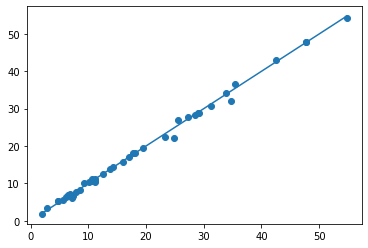

In [66]:
plt.scatter(y_test, new_y_pred_kkr)
plt.plot(np.linspace(y_test.min(), y_test.max()), np.linspace(y_test.min(), y_test.max()))

# Y a t'il une base plus naturelle (et plus interprétable) que la PCA ?
Quid de la piste FFT ?  

Est ce que la FFT est capable de capturer les détails des dérivées de l'absorption ?

In [67]:
fft_basis = np.fft.rfft(ddydx)[..., :9]

Text(0, 0.5, "dérivée de l'absorption")

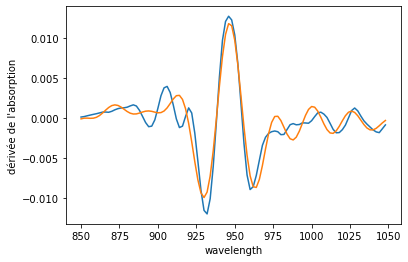

In [68]:
plt.plot(x_axis, ddydx[42], label="Modèle original")
plt.plot(x_axis, np.fft.irfft(fft_basis, n=100)[42], label='Reconstruction à partir des 9 premières fréquences')
plt.xlabel("wavelength")
plt.ylabel("dérivée de l'absorption")

Construction d'un dataset à partir des FFT des dérivées de l'absorption

In [69]:
I= 9

In [70]:
fft_X_train = np.abs(np.concatenate([np.fft.rfft(np.gradient(X_train_abs, axis=1))[..., :I],
               np.fft.rfft(np.gradient(np.gradient(X_train_abs, axis=1), axis=1))[..., :I]], axis=1))

In [71]:
fft_X_test = np.abs(np.concatenate([np.fft.rfft(np.gradient(X_test_abs, axis=1))[..., :I],
               np.fft.rfft(np.gradient(np.gradient(X_test_abs, axis=1), axis=1))[..., :I]], axis=1))

In [72]:
param_grid = [{
    "alpha":  np.linspace(1e-8, 1e-6, 400),
    "kernel": ['poly', 'polynomial', 'rbf', 'chi2'],
    "degree": np.arange(1,5)
}]

In [73]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(estimator=kkr, param_grid=param_grid, cv=4,
                       scoring='%s' % score, n_jobs=10)
    clf.fit(fft_X_train, y_train)
    print(clf.best_params_)
    print(clf.best_score_)

# Tuning hyper-parameters for r2

{'alpha': 1e-06, 'degree': 2, 'kernel': 'poly'}
0.9922045820089657


In [74]:
kkr = KernelRidge(**clf.best_params_)

In [75]:
kkr.fit(fft_X_train, y_train)

KernelRidge(alpha=1e-06, degree=2, kernel='poly')

In [76]:
fft_y_pred_kkr = kkr.predict(fft_X_test)

In [77]:
print("Performance R2 avec la FFT et la méthode de Kernel Ridge", kkr.score(fft_X_test, y_test))

Performance R2 avec la FFT et la méthode de Kernel Ridge 0.9975442192086797


In [78]:
print("Performance SEP avec la FFT et la méthode de Kernel Ridge", SEP(fft_y_pred_kkr, y_test))

Performance SEP avec la FFT et la méthode de Kernel Ridge 0.6628821116096236


Ca fonctionne un peu mieux ! On a les mêmes performance que le (1)